<a href="https://colab.research.google.com/github/CrystalWang1225/ECE-471-Frequentist-Machine-Learning/blob/main/ML_5_Yingzhi_%26_Crystal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

Yingzhi & Crystal

# Fetching data - Californian Housing


In [ ]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
data = datasets.fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MedHouseVal'])


# Splitting test and training set, from https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
msk = np.random.rand(len(df)) <=0.8
X_train = df[msk]
y_train = target[msk]
X_test = df[~msk]
y_test = target[~msk]

num_trees = 250

# Random Forest and Gradient Boosting Tree - Californian Housing

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.ensemble import GradientBoostingRegressor

def get_random_forest(max_depth):
  regressor = RandomForestRegressor(max_depth=max_depth)
  return regressor

def get_boosting_tree(max_depth):
  boosting = GradientBoostingRegressor(max_depth=max_depth)
  return boosting

regressor = {
    'RF m=2': get_random_forest(max_depth=2),
    'RF m=6': get_random_forest(max_depth = 6),
    'GBM depth=4': get_boosting_tree(max_depth = 4),
    'GBM depth=6': get_boosting_tree(max_depth = 6)
}

# Thanks to Yuval that helps me with organizing the code using a dic and set_params
def get_regressor(X_train,y_train, X_test, y_test):
  mae = {}
  for name, tree in regressor.items():
    mae[name] = []
    for i in range(1, num_trees):
      tree.set_params(n_estimators=i)
      tree.fit(X_train, y_train)
      y_pred = tree.predict(X_test)
      each_mae = metrics.mean_absolute_error(y_test, y_pred)
      mae[name].append(each_mae)

  return mae

mae = get_regressor(X_train,y_train, X_test, y_test)

print("mae:", mae)



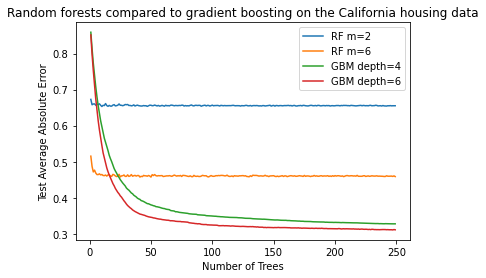

In [ ]:
num_iteration = np.arange(1, num_trees)

plt.plot(num_iteration, mae['RF m=2'])
plt.plot(num_iteration, mae['RF m=6'])
plt.plot(num_iteration, mae['GBM depth=4'])
plt.plot(num_iteration, mae['GBM depth=6'])

plt.legend(('RF m=2','RF m=6','GBM depth=4','GBM depth=6'))
plt.title("Random forests compared to gradient boosting on the California housing data")
plt.xlabel('Number of Trees')
plt.ylabel('Test Average Absolute Error')
plt.show()

# Feature Importance Comparision - Californican Housing

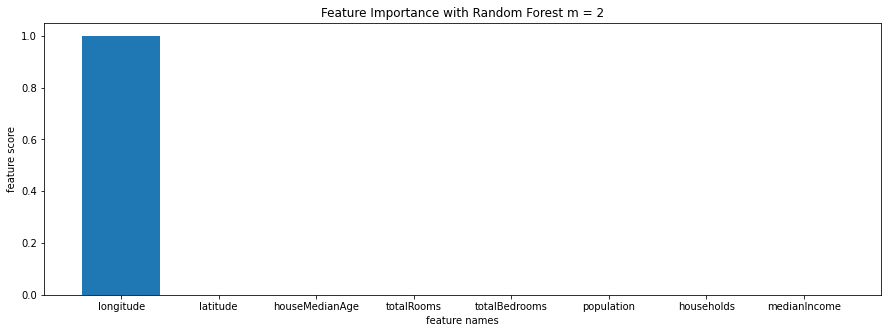

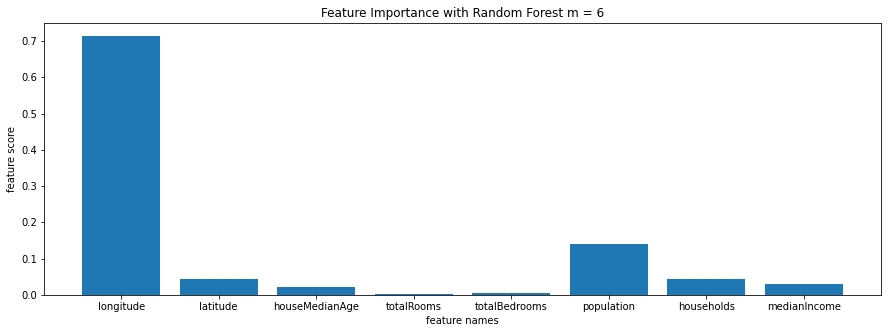

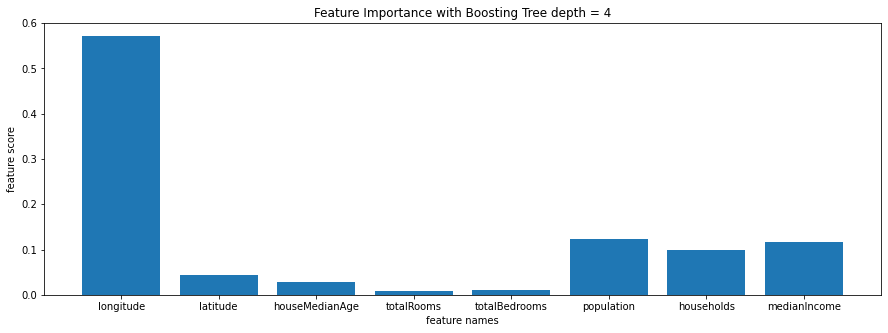

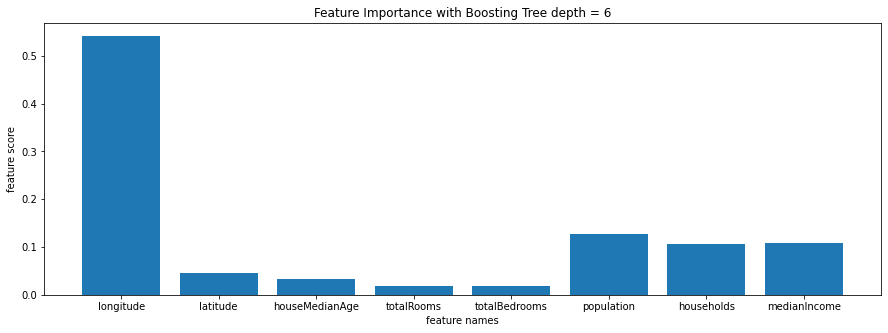

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor

feature_name = ['longitude','latitude', 'houseMedianAge','totalRooms', 'totalBedrooms', 'population', 'households','medianIncome']
random_regressor2 = RandomForestRegressor(max_depth=2, n_estimators=250)
random_regressor6 = RandomForestRegressor(max_depth=6, n_estimators=250)
boosting_regressor4 = GradientBoostingRegressor(max_depth=4,n_estimators=250)
boosting_regressor6 = GradientBoostingRegressor(max_depth=6,n_estimators=250)

plt.figure(figsize=(15,5))
random_regressor2.fit(X_train, y_train)
importance_2_random = random_regressor2.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_2_random)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Random Forest m = 2")
plt.show()

plt.figure(figsize=(15,5))
random_regressor6.fit(X_train, y_train)
importance_6_random = random_regressor6.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_6_random)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Random Forest m = 6")
plt.show()

plt.figure(figsize=(15,5))
boosting_regressor4.fit(X_train, y_train)
importance_4_boost = boosting_regressor4.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_4_boost)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Boosting Tree depth = 4")
plt.show()

plt.figure(figsize=(15,5))
boosting_regressor6.fit(X_train, y_train)
importance_6_boost = boosting_regressor6.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_6_boost)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Boosting Tree depth = 6")
plt.show()




# Fetching data - UCI Early stage diabetes risk prediction dataset

This dataset is obtained from https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

In [ ]:
from sklearn import datasets
import xgboost as xgb
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings

url = "https://raw.githubusercontent.com/1995hyz/Frequentist_ML/master/diabetes_data_upload.csv"
df = pd.read_csv(url, sep=",")
df['class'] = df['class'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Polyuria'] = df['Polyuria'].astype('category').cat.codes
df['Polydipsia'] = df['Polydipsia'].astype('category').cat.codes
df['sudden weight loss'] = df['sudden weight loss'].astype('category').cat.codes
df['weakness'] = df['weakness'].astype('category').cat.codes
df['Polyphagia'] = df['Polyphagia'].astype('category').cat.codes
df['Genital thrush'] = df['Genital thrush'].astype('category').cat.codes
df['visual blurring'] = df['visual blurring'].astype('category').cat.codes
df['Itching'] = df['Itching'].astype('category').cat.codes
df['Irritability'] = df['Irritability'].astype('category').cat.codes
df['delayed healing'] = df['delayed healing'].astype('category').cat.codes
df['partial paresis'] = df['partial paresis'].astype('category').cat.codes
df['muscle stiffness'] = df['muscle stiffness'].astype('category').cat.codes
df['Alopecia'] = df['Alopecia'].astype('category').cat.codes
df['Obesity'] = df['Obesity'].astype('category').cat.codes

target = df['class']
df = df.drop(labels=['class'], axis=1)

# Splitting test and training set, from https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
msk = np.random.rand(len(df)) <=0.8
X_train = df[msk]
y_train = target[msk]
X_test = df[~msk]
y_test = target[~msk]

num_trees = 250

# Random Forest and Gradient Boosting Tree - UCI Early stage diabetes risk prediction dataset



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.ensemble import GradientBoostingRegressor

def get_random_forest(max_depth):
  regressor = RandomForestRegressor(max_depth=max_depth)
  return regressor

def get_boosting_tree(max_depth):
  boosting = GradientBoostingRegressor(max_depth=max_depth)
  return boosting

regressor = {
    'RF m=2': get_random_forest(max_depth=2),
    'RF m=6': get_random_forest(max_depth = 6),
    'GBM depth=4': get_boosting_tree(max_depth = 4),
    'GBM depth=6': get_boosting_tree(max_depth = 6)
}

# Thanks to Yuval that helps me with organizing the code using a dic and set_params
def get_regressor(X_train,y_train, X_test, y_test):
  mae = {}
  for name, tree in regressor.items():
    mae[name] = []
    for i in range(1, num_trees):
      tree.set_params(n_estimators=i)
      tree.fit(X_train, y_train)
      y_pred = tree.predict(X_test)
      each_mae = metrics.mean_absolute_error(y_test, y_pred)
      mae[name].append(each_mae)

  return mae

mae = get_regressor(X_train,y_train, X_test, y_test)


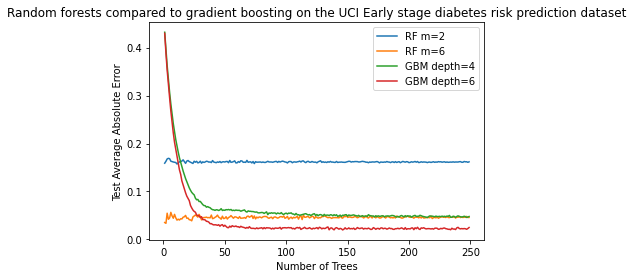

In [ ]:
num_iteration = np.arange(1, num_trees)

plt.plot(num_iteration, mae['RF m=2'])
plt.plot(num_iteration, mae['RF m=6'])
plt.plot(num_iteration, mae['GBM depth=4'])
plt.plot(num_iteration, mae['GBM depth=6'])

plt.legend(('RF m=2','RF m=6','GBM depth=4','GBM depth=6'))
plt.title("Random forests compared to gradient boosting on the UCI Early stage diabetes risk prediction dataset")
plt.xlabel('Number of Trees')
plt.ylabel('Test Average Absolute Error')
plt.show()

# Feature Importance Comparision - UCI Early stage diabetes risk prediction dataset

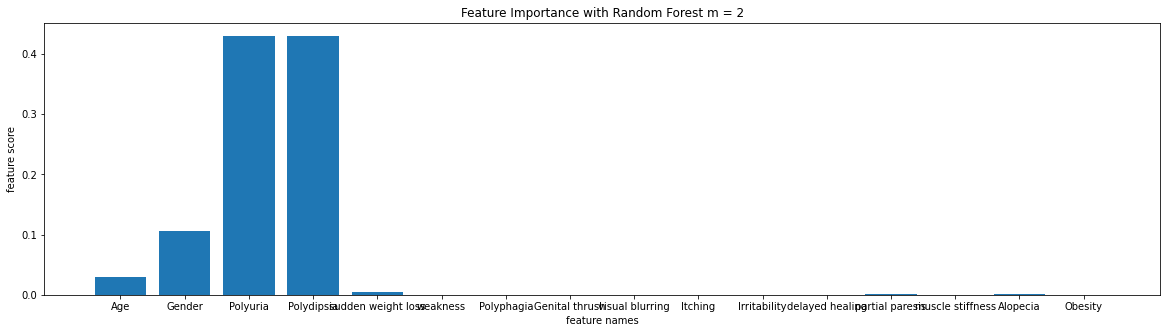

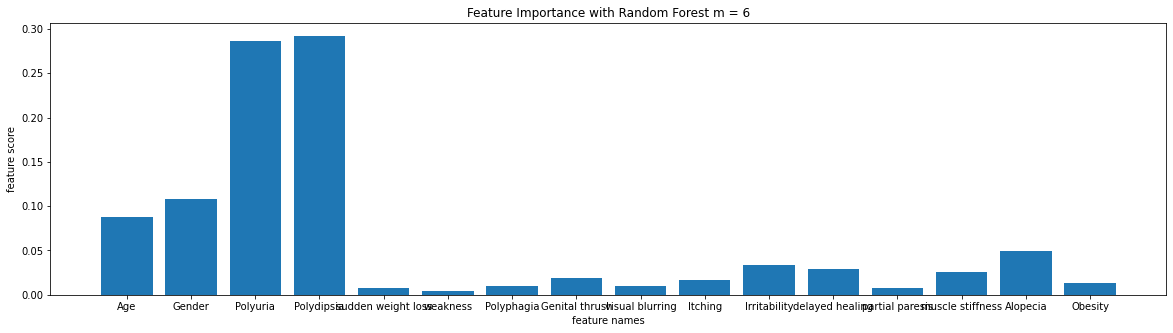

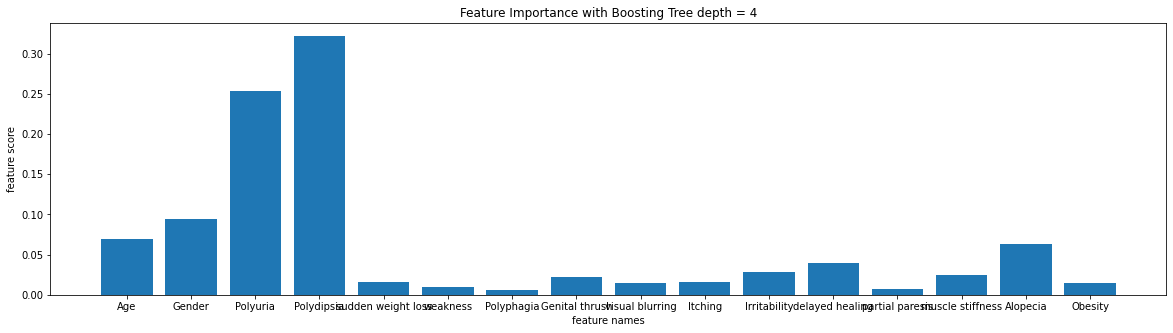

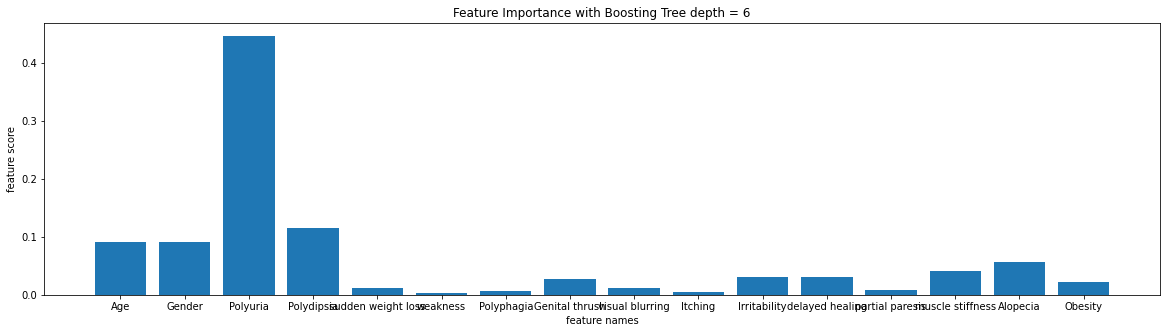

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

feature_name = ['Age','Gender', 'Polyuria','Polydipsia', 'sudden weight loss',
                'weakness', 'Polyphagia','Genital thrush', 'visual blurring',
                'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                'muscle stiffness', 'Alopecia', 'Obesity']
random_regressor2 = RandomForestRegressor(max_depth=2, n_estimators=250)
random_regressor6 = RandomForestRegressor(max_depth=6, n_estimators=250)
boosting_regressor4 = GradientBoostingRegressor(max_depth=4,n_estimators=250)
boosting_regressor6 = GradientBoostingRegressor(max_depth=6,n_estimators=250)

plt.figure(figsize=(20,5))
random_regressor2.fit(X_train, y_train)
importance_2_random = random_regressor2.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_2_random)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Random Forest m = 2")
plt.show()

plt.figure(figsize=(20,5))
random_regressor6.fit(X_train, y_train)
importance_6_random = random_regressor6.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_6_random)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Random Forest m = 6")
plt.show()

plt.figure(figsize=(20,5))
boosting_regressor4.fit(X_train, y_train)
importance_4_boost = boosting_regressor4.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_4_boost)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Boosting Tree depth = 4")
plt.show()

plt.figure(figsize=(20,5))
boosting_regressor6.fit(X_train, y_train)
importance_6_boost = boosting_regressor6.feature_importances_
# plot feature importance
plt.bar(feature_name, importance_6_boost)
plt.ylabel("feature score")
plt.xlabel("feature names")
plt.title("Feature Importance with Boosting Tree depth = 6")
plt.show()